In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats.mstats import gmean

### load files

In [2]:
f76_ml_78056 = pd.read_csv('76f-78056.csv')
f91_ml_78035 = pd.read_csv('91f_ml-78035.csv')
f91_nn_78002 = pd.read_csv('91f_nn-78002.csv')
f94_bin_ml_78055 = pd.read_csv('94f+bin-78055.csv')
f94_ml_78021 = pd.read_csv('94f-78021.csv')
f120_ml_78068 = pd.read_csv('120f-78068.csv')
f155_ml_78049 = pd.read_csv('155f-78049.csv')

### change column name

In [3]:
f76_ml_78056['f76_ml_78056'] = f76_ml_78056['voted']
f76_ml_78056 = f76_ml_78056[['f76_ml_78056']]

f91_ml_78035['f91_ml_78035'] = f91_ml_78035['voted']
f91_ml_78035 = f91_ml_78035[['f91_ml_78035']]

f91_nn_78002['f91_nn_78002'] = f91_nn_78002['voted']
f91_nn_78002 = f91_nn_78002[['f91_nn_78002']]

f94_bin_ml_78055['f94_bin_ml_78055'] = f94_bin_ml_78055['voted']
f94_bin_ml_78055 = f94_bin_ml_78055[['f94_bin_ml_78055']]

f94_ml_78021['f94_ml_78021'] = f94_ml_78021['voted']
f94_ml_78021 = f94_ml_78021[['f94_ml_78021']]

f120_ml_78068['f120_ml_78068'] = f120_ml_78068['voted']
f120_ml_78068 = f120_ml_78068[['f120_ml_78068']]

f155_ml_78049['f155_ml_78049'] = f155_ml_78049['voted']
f155_ml_78049 = f155_ml_78049[['f155_ml_78049']]

## concat features
df = pd.concat([f76_ml_78056, f91_ml_78035, f91_nn_78002, f94_bin_ml_78055,
                f94_ml_78021, f120_ml_78068, f155_ml_78049], axis=1)


In [4]:
df

,f76_ml_78056,f91_ml_78035,f91_nn_78002,f94_bin_ml_78055,f94_ml_78021,f120_ml_78068,f155_ml_78049
0,0.701095,0.621013,1.540208,0.615728,0.630117,0.620020,0.609632
1,0.865573,0.905113,1.935810,0.886705,0.886409,0.888554,0.877929
2,0.464307,0.467603,1.468728,0.504819,0.503154,0.503797,0.483499
3,0.198371,0.202239,1.144168,0.215582,0.218575,0.222710,0.210377
4,0.745960,0.728680,1.655815,0.729738,0.736327,0.731203,0.735890
...,...,...,...,...,...,...,...
11378,0.425329,0.431638,1.348614,0.483597,0.469808,0.480372,0.450938
11379,0.884394,0.877952,1.823976,0.883979,0.874539,0.884300,0.880782
11380,0.230602,0.218910,1.204272,0.224195,0.232993,0.231343,0.241707
11381,0.339513,0.322717,1.276139,0.346798,0.344720,0.341561,0.330032


### Correlation Heatmap

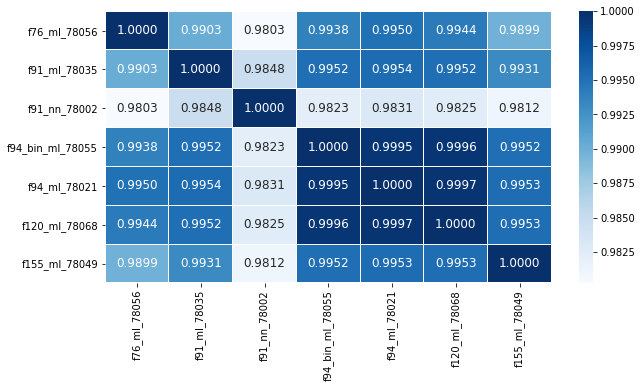

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.01, annot_kws={'size' : 12}, fmt = '.4f')
plt.show()

### 지금까지의 시도_ 누적시키기

<font color ='blue'>
    
# Esemble Subs

In [ ]:
## 피쳐명
f120_ml_78068
f76_ml_78056
f94_bin_ml_78055
f155_ml_78049
f91_ml_78035
f94_ml_78021
f91_nn_78002

#### 11/13 금요일

In [48]:
# GMEAN[(1+7)/(2+6)/(3+4+5)]
submission_name = 'GMEAN[(1+7)(2+6)(3+4+5)].csv'

pred1 = gmean([f120_ml_78068['f120_ml_78068'], f91_nn_78002['f91_nn_78002']])
pred2 = gmean([f76_ml_78056['f76_ml_78056'], f94_ml_78021['f94_ml_78021']])
pred3 = gmean([f94_bin_ml_78055['f94_bin_ml_78055'], f155_ml_78049['f155_ml_78049'],f91_ml_78035['f91_ml_78035']])

final_pred = gmean([pred1, pred2, pred3])
sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('기하평균 출력완료!')

기하평균 출력완료!


#### 11/14 토요일

In [50]:
# (91nn + 94ml)+(155ml+76ml)+(91ml+94bin_ml)+120ml
submission_name = 'GMEAN[(91nn + 94ml)+(155ml+76ml)+(91ml+94bin_ml)+120ml].csv'

pred1 = gmean([f91_nn_78002['f91_nn_78002'], f94_ml_78021['f94_ml_78021']])
pred2 = gmean([f155_ml_78049['f155_ml_78049'], f76_ml_78056['f76_ml_78056']])
pred3 = gmean([f91_ml_78035['f91_ml_78035'], f94_bin_ml_78055['f94_bin_ml_78055']])
pred4 = f120_ml_78068['f120_ml_78068']

final_pred = gmean([pred1, pred2, pred3, pred4])
sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('기하평균 출력완료!')

# 94_ml_78021빼고 GMEAN
submission_name = 'GMEAN[94_ml_78021빼고 GMEAN].csv'

final_pred = gmean([f91_nn_78002['f91_nn_78002'], f155_ml_78049['f155_ml_78049'],
                    f76_ml_78056['f76_ml_78056'], f91_ml_78035['f91_ml_78035'],
                    f94_bin_ml_78055['f94_bin_ml_78055'], f120_ml_78068['f120_ml_78068']])
sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('기하평균 출력완료!')

# 94_ml_78021빼고 POWER_MEAN
submission_name = 'POWER_MEAN_p5[94_ml_78021빼고 GMEAN].csv'

p = 5
submission_list = [f91_nn_78002['f91_nn_78002'], f155_ml_78049['f155_ml_78049'],
                   f76_ml_78056['f76_ml_78056'], f91_ml_78035['f91_ml_78035'],
                   f94_bin_ml_78055['f94_bin_ml_78055'], f120_ml_78068['f120_ml_78068']]
sum_pred = np.zeros(11383)
for sub in submission_list:
    sum_pred += sub ** p
pred_mean = (sum_pred / len(submission_list)) ** (1 / p)

sub = pd.DataFrame({'index':range(11383), 'voted':pred_mean})
sub.to_csv(f'{submission_name}', index=False) 
print('멱평균 출력완료!')


기하평균 출력완료!
기하평균 출력완료!
멱평균 출력완료!


#### 11/15 일요일

In [22]:
# 94_ml_78021빼고 POWER_MEAN : 0.780021
submission_name = 'POWER_MEAN_p115[94_ml_78021빼고 GMEAN].csv'

p = 11.5
submission_list = [f91_nn_78002['f91_nn_78002'], f155_ml_78049['f155_ml_78049'],
                   f76_ml_78056['f76_ml_78056'], f91_ml_78035['f91_ml_78035'],
                   f94_bin_ml_78055['f94_bin_ml_78055'], f120_ml_78068['f120_ml_78068']]
sum_pred = np.zeros(11383)
for sub in submission_list:
    sum_pred += sub ** p
pred_mean = (sum_pred / len(submission_list)) ** (1 / p)

sub = pd.DataFrame({'index':range(11383), 'voted':pred_mean})
sub.to_csv(f'{submission_name}', index=False) 
print('멱평균 출력완료!')


멱평균 출력완료!


In [46]:
# 5개 가중평균 : 0.781246
submission_name = 'NN 0.4 ML 0.6.csv'

final_pred = f91_ml_78035['f91_ml_78035'] * 0.4 + \
            f120_ml_78068['f120_ml_78068'] * 0.2 + \
            f76_ml_78056['f76_ml_78056'] * 0.15 + \
            f94_bin_ml_78055['f94_bin_ml_78055'] * 0.15 + \
            gmean([f155_ml_78049['f155_ml_78049'], f91_nn_78002['f91_nn_78002']]) * 0.10

sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('기하평균 출력완료!')

기하평균 출력완료!


In [47]:
# Arithmetic[(2+4)+(1+6+7)+3+5] : 변수 많은거끼리, 적은거끼리의 조합: 0.7812004
submission_name = 'Arithmetic[(2+4)+(1+6+7)+3+5].csv'

pred1 = gmean([f76_ml_78056['f76_ml_78056'], f155_ml_78049['f155_ml_78049']])
pred2 = gmean([f120_ml_78068['f120_ml_78068'], f94_ml_78021['f94_ml_78021'], f91_nn_78002['f91_nn_78002']])
pred3 = f94_bin_ml_78055['f94_bin_ml_78055']
pred4 = f91_ml_78035['f91_ml_78035']

final_pred = (pred1 + pred2 + pred3 + pred4) / 4

sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('산술평균 출력완료!')


산술평균 출력완료!


#### 11/16 월요일

In [56]:
# 94_ml_78021빼고 Arithmetic: 0.7816667
submission_name = '94_ml_78021빼고 Arithmetic.csv'

final_pred = f91_nn_78002['f91_nn_78002'] 1.2+ \
              f155_ml_78049['f155_ml_78049'] + \
              f76_ml_78056['f76_ml_78056'] + \
              f91_ml_78035['f91_ml_78035'] + \
              f94_bin_ml_78055['f94_bin_ml_78055'] + \
              f120_ml_78068['f120_ml_78068']
final_pred = final_pred / 6

sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('산술평균 출력완료!')

산술평균 출력완료!


In [65]:
# 94_ml_78021빼고 Arithmetic + weight : 0.7816041
submission_name = '94_ml_78021빼고 Arithmetic + weight.csv'

final_pred = f91_nn_78002['f91_nn_78002'] * 1.05 + \
              f155_ml_78049['f155_ml_78049'] * 1.1 + \
              f76_ml_78056['f76_ml_78056'] * 1.2 + \
              f91_ml_78035['f91_ml_78035'] * 1.15 + \
              f94_bin_ml_78055['f94_bin_ml_78055'] * 1.2 + \
              f120_ml_78068['f120_ml_78068'] * 1.3 
final_pred = final_pred / 6

sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('산술평균 출력완료!')

산술평균 출력완료!


In [67]:
# best 두개로 산술평균
pred1 = pd.read_csv('94_ml_78021빼고 Arithmetic.csv')['voted']
pred2 = pd.read_csv('GMEAN[94_ml_78021빼고 GMEAN].csv')['voted']
submission_name = '베스트2개산술평균.csv'

final_pred = pred1 + pred2
final_pred = final_pred / 2

sub = pd.DataFrame({'index':range(11383), 'voted':final_pred})
sub.to_csv(f'{submission_name}', index=False) 
print('산술평균 출력완료!')

산술평균 출력완료!


In [68]:
pd.read_csv('베스트2개산술평균.csv')

,index,voted
0,0,0.759187
1,1,1.033979
2,2,0.615829
3,3,0.321889
4,4,0.864361
...,...,...
11378,11378,0.573741
11379,11379,1.017518
11380,11380,0.347034
11381,11381,0.456250
